# 词嵌入模型与语义投影
参考文献：Grand, G., Blank, I.A., Pereira, F. and Fedorenko, E., 2022. Semantic projection recovers rich human knowledge of multiple object features from word embeddings. Nature Human Behaviour, pp.1-13.

参考教程：https://mp.weixin.qq.com/s/jsHXpYhNJCZ6VDse9Xwb_Q

In [1]:
'''
#首先安装需要的包
!pip3 install whatlies==0.7.0
!pip3 install matplotlib_inline
!pip3 install gensim==4.2.0

'''

     -------------------------------------- 84.6/84.6 kB 432.6 kB/s eta 0:00:00
     --------------------------------------- 24.2/24.2 MB 10.9 MB/s eta 0:00:00
     ------------------------------------- 813.6/813.6 kB 17.5 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 35.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.32
    Uninstalling Cython-0.29.32:
      Successfully uninstalled Cython-0.29.32
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0


     --------------------------------------- 24.0/24.0 MB 22.6 MB/s eta 0:00:00
     ------------------------------------- 983.8/983.8 kB 31.4 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.14
    Uninstalling Cython-0.29.14:
      Successfully uninstalled Cython-0.29.14
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
whatlies 0.7.0 requires gensim~=3.8.3, but you have gensim 4.2.0 which is incompatible.


## 下载词向量资源
中文词向量资源 https://github.com/Embedding/Chinese-Word-Vectors

Shen Li, Zhe Zhao, Renfen Hu, Wensi Li, Tao Liu, Xiaoyong Du, Analogical Reasoning on Chinese Morphological and Semantic Relations, ACL 2018.

此处使用预训练的人民日报词向量做测试

In [1]:
from gensim.models.keyedvectors import KeyedVectors

# 人民日报 sgns.renmin.word.bz2 为例  
#"H:\课程\DATA\sgns.renmin.word.bz2"
pdaily_wv = KeyedVectors.load_word2vec_format('H:/课程/DATA/sgns.renmin.word.bz2', 
                                             binary=False, 
                                             unicode_errors='ignore')

D:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
#查看词汇量
len(pdaily_wv)

355987

In [3]:
#提取某个词的向量
pdaily_wv['人民']

array([ 1.64313e-01, -4.31710e-02,  1.67749e-01,  5.03090e-02,
       -2.48748e-01,  9.48800e-03,  2.11642e-01,  4.59560e-02,
        1.14928e-01,  2.54482e-01,  1.73634e-01,  9.07000e-02,
       -2.76401e-01,  2.69877e-01,  3.87000e-02,  1.46361e-01,
       -2.11393e-01,  4.17446e-01,  4.66310e-02, -2.79912e-01,
        1.35812e-01,  9.45610e-02,  3.14769e-01, -1.23438e-01,
       -4.49589e-01, -6.08670e-02, -7.41950e-02, -2.51548e-01,
        1.28148e-01, -5.59700e-02,  5.23940e-02,  4.09700e-02,
       -2.51117e-01,  6.49830e-02, -4.90290e-01, -1.92180e-01,
       -3.83229e-01,  4.24360e-02, -7.55521e-01,  4.00192e-01,
        3.52161e-01,  2.90011e-01,  7.84775e-01,  9.74940e-02,
        5.28462e-01,  5.22956e-01, -1.09933e-01, -2.15697e-01,
        3.33763e-01, -1.56300e-02, -1.29792e-01,  9.30630e-02,
       -1.17581e-01,  8.86400e-02, -6.26970e-02, -1.42509e-01,
        3.63720e-02, -1.86804e-01, -6.62520e-02,  1.03657e-01,
       -3.28504e-01, -1.38237e-01,  1.63520e-01,  1.601

In [4]:
#查看词的维度
len(pdaily_wv['人民'])

300

In [5]:
#最相似的词
pdaily_wv.most_similar("可爱", topn=10)

[('娇憨', 0.6214803457260132),
 ('逗人喜爱', 0.5989802479743958),
 ('无邪', 0.5909478664398193),
 ('健康活泼', 0.5882358551025391),
 ('乖巧', 0.5867952108383179),
 ('活泼可爱', 0.5852850675582886),
 ('那群', 0.5847833752632141),
 ('驯良', 0.5839908123016357),
 ('丑得', 0.581652820110321),
 ('憨态', 0.5774826407432556)]

## 向量投影

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import platform
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'svg')
# 以下代码从全局设置字体为SimHei（黑体），解决显示中文问题【Windows】
# 设置font.sans-serif 或 font.family 均可
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.family']=['SimHei']
# 解决中文字体下坐标轴负数的负号显示问题
plt.rcParams['axes.unicode_minus'] = False 

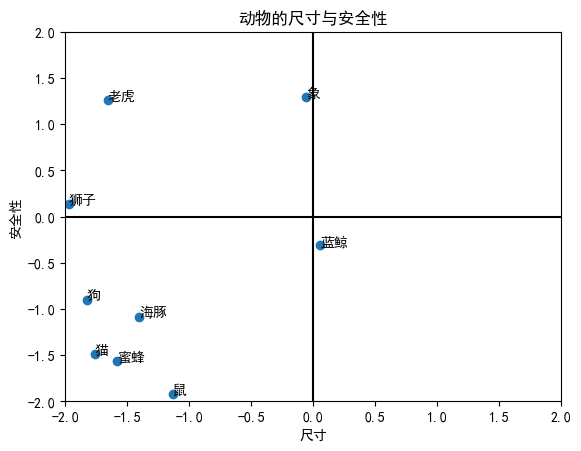

In [27]:
# 获取需要绘制的单词列表
words = ['海豚', '象', '狮子', '老虎', '蓝鲸', '狗', '猫', '鼠', '蜜蜂']

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([pdaily_wv[word] for word in words])

# 把大-小（尺寸）作为特征子空间
x_axis = pdaily_wv[['大']].mean(axis=0) - pdaily_wv[['小']].mean(axis=0)

# 把危险-安全（危险性）作为特征子空间
y_axis = pdaily_wv[['危险', '威胁', '可怕']].mean(axis=0) - pdaily_wv[['安全', '无害', '可爱']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]))

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel('尺寸')
plt.ylabel('安全性')

plt.title('动物的尺寸与安全性')
#plt.show()

#保存
plt.savefig(fname="动物的尺寸与安全性.png", dpi=300)

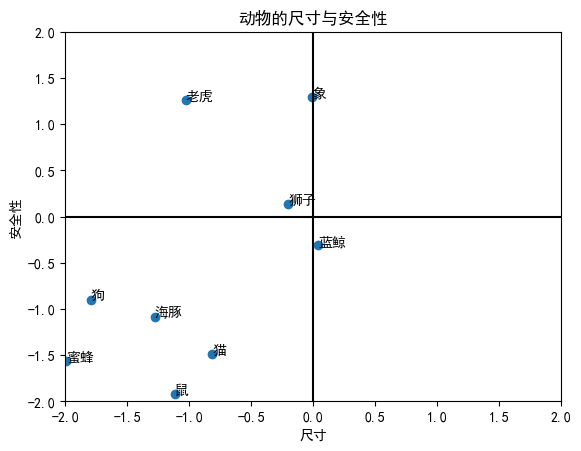

In [26]:
# 获取需要绘制的单词列表
words = ['海豚', '象', '狮子', '老虎', '蓝鲸', '狗', '猫', '鼠', '蜜蜂']

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([pdaily_wv[word] for word in words])

# 把大-小（尺寸）作为特征子空间
x_axis = pdaily_wv[['巨大', '极大', '大']].mean(axis=0) - pdaily_wv[['很小', '太小', '小']].mean(axis=0)

# 把危险-安全（危险性）作为特征子空间
y_axis = pdaily_wv[['危险', '威胁', '可怕']].mean(axis=0) - pdaily_wv[['安全', '无害', '可爱']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]))

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel('尺寸')
plt.ylabel('安全性')

plt.title('动物的尺寸与安全性')
#plt.show()

#保存
plt.savefig(fname="动物的尺寸与安全性.png", dpi=300)

In [9]:
words = ['海豚', '象', '狮子', '老虎', '蓝鲸', '狗', '猫', '鼠', '蜜蜂']
dis_from_vec = []
for i in words:
    dis1 = pdaily_wv.distance(i,'巨大')
    dis2 = pdaily_wv.distance(i,'极大')
    dis3 = pdaily_wv.distance(i,'大')
    dis = (dis1+dis2+dis3)/3
    dis_from_vec.append(dis)

In [10]:
import pandas as pd
size_dis = pd.DataFrame(data = list(zip(words, dis_from_vec)),columns =['animal','distance'])

In [11]:
size_dis.sort_values('distance')

,animal,distance
1,象,0.825249
4,蓝鲸,0.837640
6,猫,0.851794
3,老虎,0.870167
2,狮子,0.870390
0,海豚,0.879822
5,狗,0.882804
8,蜜蜂,0.898865
7,鼠,0.906508


跟单独与某一极的词向量求距离相比，在特征维度上投影的结果更真实。

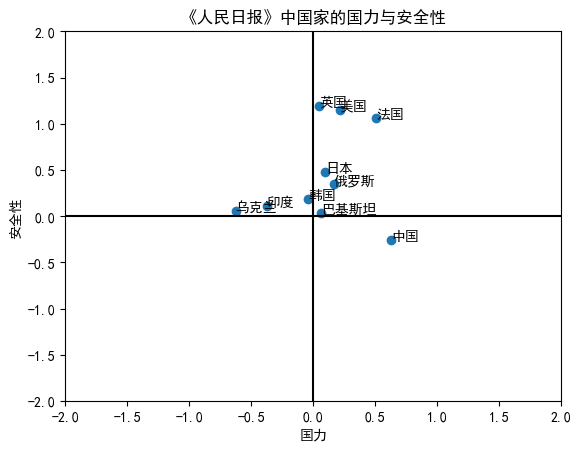

In [12]:
# 获取需要绘制的单词列表
words = ['美国', '中国', '日本', '英国', '印度', '韩国', '俄罗斯', '乌克兰', '巴基斯坦', '法国']

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([pdaily_wv[word] for word in words])

# 把强大-弱小（国力）作为特征子空间
x_axis = pdaily_wv[['强大', '富有', '发达']].mean(axis=0) - pdaily_wv[['弱小', '贫穷', '落后']].mean(axis=0)

# 把危险-安全（危险性）作为特征子空间
y_axis = pdaily_wv[['危险', '威胁', '战争']].mean(axis=0) - pdaily_wv[['安全', '无害', '和平']].mean(axis=0)

# 计算每个词向量在新坐标系中的投影
x_coords = np.dot(vectors, x_axis)
y_coords = np.dot(vectors, y_axis)

# 绘制图形
fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)

for i, word in enumerate(words):
    ax.annotate(word, (x_coords[i], y_coords[i]))

# 绘制 x 轴和 y 轴的十字线
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.xlabel('国力')
plt.ylabel('安全性')

plt.title('《人民日报》中国家的国力与安全性')
#plt.show()

#保存
plt.savefig(fname="《人民日报》中国家的国力与安全性.png", dpi=300)

In [14]:
#参照论文中的方法
# 获取需要绘制的单词列表
from sklearn.decomposition import PCA

words = ['海豚', '象', '狮子', '老虎', '蓝鲸', '狗', '猫', '鼠', '蜜蜂', '巨大', '极大', '大', '很小', '太小', '小']

# 获取词向量，并转换为 NumPy 数组
vectors = np.array([pdaily_wv[word] for word in words])

pca = PCA(n_components=3)   #降到3维
pca.fit(vectors)                  
new_vectors=pca.fit_transform(vectors)

In [15]:
new_vectors

array([[-1.3640988 ,  0.7155162 ,  1.8507148 ],
       [ 0.15477127, -0.22500618,  1.3658524 ],
       [-1.8734536 , -1.6792411 , -0.17757078],
       [-1.7432069 , -1.2516356 , -1.3544899 ],
       [-0.67184716,  0.0891082 ,  0.9518924 ],
       [-1.6844541 ,  0.37536559, -0.9105619 ],
       [-1.9639002 , -0.49276498, -0.8577417 ],
       [-2.2922082 ,  0.10021254, -1.1198632 ],
       [-1.3063357 ,  2.4249997 ,  2.0191023 ],
       [ 2.4199717 , -1.6971979 ,  1.0926749 ],
       [ 2.157927  , -2.1882188 ,  0.84450936],
       [ 2.2644637 ,  0.15223841, -0.32406938],
       [ 2.1311302 ,  1.0545695 , -0.93325377],
       [ 2.1224847 ,  1.5175301 , -1.2620474 ],
       [ 1.6487563 ,  1.1045245 , -1.1851484 ]], dtype=float32)

In [16]:
# 把大-小（尺寸）作为特征子空间
avg_size_big = new_vectors[9:12].mean(axis = 0)
avg_size_small = new_vectors[12:15].mean(axis = 0)

In [17]:
avg_size_big

array([ 2.2807875 , -1.2443928 ,  0.53770494], dtype=float32)

In [18]:
size_xs = [avg_size_big[0],avg_size_small[0]]
size_ys = [avg_size_big[1],avg_size_small[1]]
size_zs = [avg_size_big[2],avg_size_small[2]]

In [19]:
animal_xs = new_vectors[:9,0]
animal_ys = new_vectors[:9,1]
animal_zs = new_vectors[:9,2]
animal_label = words[:9]

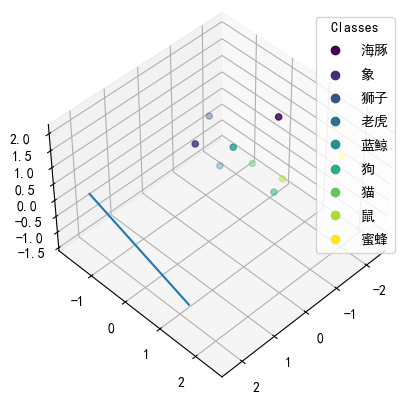

In [24]:
#导入三维工具包mplot3d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
#创建3d绘图区域
ax = plt.axes(projection='3d')
ax.plot(size_xs, size_ys, size_zs, label='size')
scatter = ax.scatter(animal_xs,animal_ys,animal_zs,c=range(9))
a,b=scatter.legend_elements()
b=['$\\mathdefault {海豚}$',
 '$\\mathdefault{象}$',
 '$\\mathdefault{狮子}$',
 '$\\mathdefault{老虎}$',
 '$\\mathdefault{蓝鲸}$',
 '$\\mathdefault{狗}$',
 '$\\mathdefault{猫}$',
 '$\\mathdefault{鼠}$',
 '$\\mathdefault{蜜蜂}$',]
legend1 = ax.legend(a,b, title="Classes")
ax.view_init(elev=45, azim=45)


## 启发
道德基础理论中每一维度都是由两极构成，如“Care-Harm”，可以使用一个大规模的语料库将许多词向量投射到这一维度，并保存下这些词语的分数，后续需要对文本进行道德基础分析时可以调用上述结果，性能应该会优于单纯的词频统计。